### General Imports

In [1]:
import numpy as np
import pandas as pd

### aequilibrium Imports

In [2]:
from aequilibrium.balance import Balance
from aequilibrium.dataset import DataSet
from aequilibrium.model import Model
from aequilibrium.results import Results
from aequilibrium.utils.api_wrapper import (
    get_best_results,
    train_and_evaluate,
    train_models,
)
from aequilibrium.visualize import Visualize

# Prepare mock data
## Must bring clean train and validation set into aequilibrium (no Nulls, only numerical variables

#### data can be downloaded here: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [3]:
base_df = pd.read_csv("data/kaggle_stroke_dataset.csv")

### User is responsible for pre-processing, including null-handling and removing categorical columns

In [4]:
base_df = base_df.select_dtypes(include=np.number)
base_df = base_df.dropna()

In [5]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(base_df)

In [6]:
print("train shape: ", train.shape)
print("val shape: ", val.shape)

train shape:  (31453, 7)
val shape:  (10485, 7)


In [7]:
features = ["age", "hypertension", "avg_glucose_level", "bmi"]
target = "stroke"

In [8]:
base_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,30669,3.0,0,0,95.12,18.0,0
1,30468,58.0,1,0,87.96,39.2,0
2,16523,8.0,0,0,110.89,17.6,0
3,56543,70.0,0,0,69.04,35.9,0
4,46136,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0
43396,5450,56.0,0,0,213.61,55.4,0
43397,28375,82.0,1,0,91.94,28.9,0
43398,27973,40.0,0,0,99.16,33.2,0


In [9]:
print(base_df["stroke"].sum() / len(base_df))

0.015332156993657304


***

# Use Case 1: High-level functionality

In [10]:
# must turn into aequilibrium DataSets first
train_data = DataSet(
    predictors=train[features],
    target=train[target],
)
val_data = DataSet(
    predictors=val[features],
    target=val[target],
)

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# non-exhaustive sample of model imports that you can pass aequilibrium
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

### Use train_and_evaluate to do most of the work for you

## User needs to bring the following:
1. training data (clean)
2. test data (clean)
3. specificy your own models (but as you see, basic sklearn models work great)

In [12]:
modeling_results = train_and_evaluate(
    train_dataset=train_data,
    test_dataset=val_data,
    models=[LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()],
    metric=[
        "true_positives",
        "true_negatives",
        "false_positives",
        "false_negatives",
        "precision",
        "recall",
        "sensitivity",
        "specificity",
        "f1_score",
        "auc_pr",
    ],
    sort_metric="auc_pr",
    balance_techniques=[
        "prototype_generation",
        "random_oversampling",
        "random_undersampling",
        "smote_oversampling",
        "smote_tomek",
        "smote_enn",
        "adasyn_sample",
    ],
    random_state=42,
)

In [14]:
# function returns dataframe with different model iterations and results on the test set
# you can directly access the models, train results, and test results from here
modeling_results

,balance_technique,model,train_result,test_result,true_positives,true_negatives,false_positives,false_negatives,precision,recall,sensitivity,specificity,f1_score,auc_pr,rank
0,random_oversampling,<aequilibrium.model.Model object at 0x7fedeb9e...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,115,7625,2717,28,0.040607,0.804196,0.804196,0.737285,0.077311,0.423737,1.0
1,random_undersampling,<aequilibrium.model.Model object at 0x7fede62e...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,115,7551,2791,28,0.039573,0.804196,0.804196,0.730130,0.075435,0.423220,2.0
2,random_undersampling,<aequilibrium.model.Model object at 0x7fede7dd...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,113,7553,2789,30,0.038939,0.790210,0.790210,0.730323,0.074220,0.416005,3.0
3,prototype_generation,<aequilibrium.model.Model object at 0x7fede647...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,112,7729,2613,31,0.041101,0.783217,0.783217,0.747341,0.078103,0.413637,4.0
4,prototype_generation,<aequilibrium.model.Model object at 0x7fede7aa...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,112,7240,3102,31,0.034848,0.783217,0.783217,0.700058,0.066726,0.410510,5.0
5,smote_enn,<aequilibrium.model.Model object at 0x7fede62b...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,111,7438,2904,32,0.036816,0.776224,0.776224,0.719203,0.070298,0.408046,6.0
6,random_undersampling,<aequilibrium.model.Model object at 0x7fedde0d...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,110,7408,2934,33,0.036137,0.769231,0.769231,0.716302,0.069030,0.404257,7.0
7,prototype_generation,<aequilibrium.model.Model object at 0x7fede633...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,110,7267,3075,33,0.034537,0.769231,0.769231,0.702669,0.066106,0.403458,8.0
8,adasyn_sample,<aequilibrium.model.Model object at 0x7fedde0d...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,105,7681,2661,38,0.037961,0.734266,0.734266,0.742700,0.072190,0.387925,9.0
9,smote_tomek,<aequilibrium.model.Model object at 0x7fede62e...,<aequilibrium.results.Results object at 0x7fed...,<aequilibrium.results.Results object at 0x7fed...,104,7731,2611,39,0.038306,0.727273,0.727273,0.747534,0.072778,0.384649,10.0


### With just one more step, you can get visualizations from the best model above

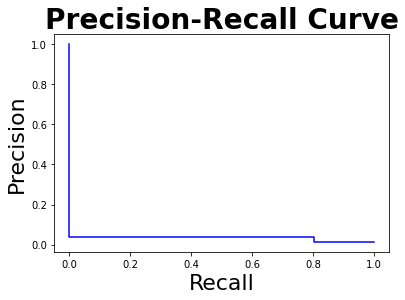

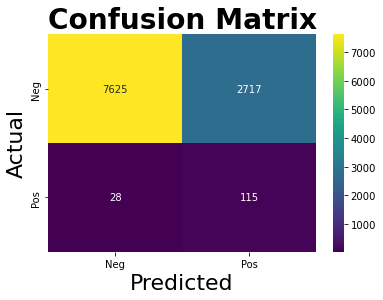

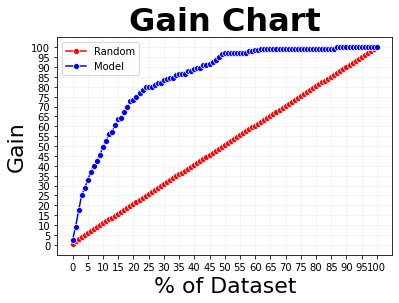

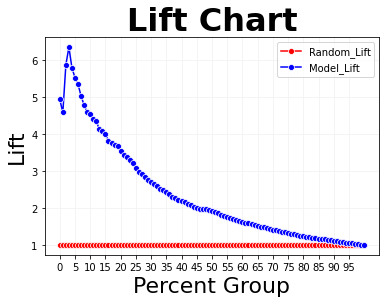

In [15]:
best_results = modeling_results["test_result"][0]
viz = Visualize(best_results, num_decimals=2)
results_df = viz.complete_evaluation()

In [16]:
results_df

,percentile,min_y_proba,max_y_proba,row_count,pos_count,perc_random_events,perc_actual_events,percentile_x_100,Random_Lift,precision,Model_Lift,recall
0,0.00,0.924158,0.954946,53,7,0.990099,4.895105,0.0,1,0.132075,4.944056,4.895105
1,0.01,0.902239,0.923904,158,13,1.980198,9.090909,1.0,1,0.082278,4.590909,9.090909
2,0.02,0.882664,0.902128,263,25,2.970297,17.482517,2.0,1,0.095057,5.885781,17.482517
3,0.03,0.862636,0.882652,367,36,3.960396,25.174825,3.0,1,0.098093,6.356643,25.174825
4,0.04,0.845894,0.861763,472,41,4.950495,28.671329,4.0,1,0.086864,5.791608,28.671329
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.008203,0.008752,10119,143,96.039604,100.000000,96.0,1,0.014132,1.041237,100.000000
97,0.97,0.007585,0.008201,10223,143,97.029703,100.000000,97.0,1,0.013988,1.030612,100.000000
98,0.98,0.007074,0.007584,10328,143,98.019802,100.000000,98.0,1,0.013846,1.020202,100.000000
99,0.99,0.006387,0.007065,10433,143,99.009901,100.000000,99.0,1,0.013707,1.010000,100.000000


# Use Case 2: Take existing results and evaluate

In [17]:
results_df = pd.read_csv("data/kaggle_stroke_results.csv")

In [18]:
results_df.head()

,Unnamed: 0,age,avg_glucose_level,bmi,stroke,y_pred,y_proba
0,1,58.0,87.96,39.2,0,0,0.01
1,3,70.0,69.04,35.9,0,0,0.04
2,6,52.0,77.59,17.7,0,0,0.00
3,7,75.0,243.53,27.0,0,0,0.05
4,8,32.0,77.67,32.3,0,0,0.00


In [19]:
y_true = "stroke"
y_pred = "y_pred"
y_proba = "y_proba"

In [20]:
results_class = Results(results_df[y_true], results_df[y_pred], results_df[y_proba])

In [21]:
results_viz = Visualize(results_class, num_decimals=5)

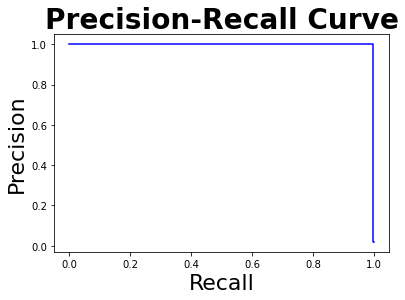

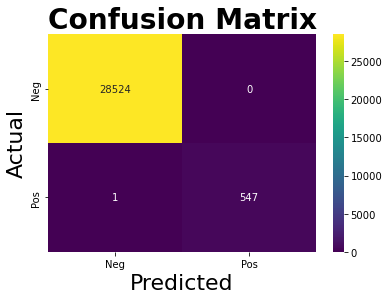

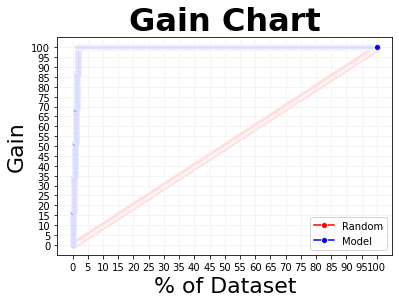

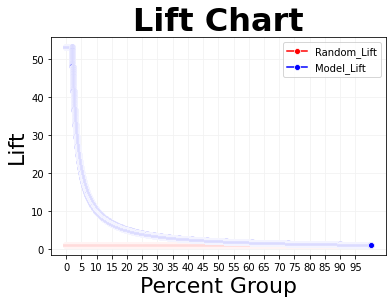

,percentile,min_y_proba,max_y_proba,row_count,pos_count,perc_random_events,perc_actual_events,percentile_x_100,Random_Lift,precision,Model_Lift,recall
0,0.00000,0.81,0.81,1,1,0.003440,0.182482,0.000,1,1.000000,53.051095,0.182482
1,0.00003,0.80,0.80,2,2,0.006879,0.364964,0.003,1,1.000000,53.051095,0.364964
2,0.00007,0.79,0.79,3,3,0.010319,0.547445,0.007,1,1.000000,53.051095,0.547445
3,0.00010,0.79,0.79,4,4,0.013759,0.729927,0.010,1,1.000000,53.051095,0.729927
4,0.00014,0.78,0.78,5,5,0.017199,0.912409,0.014,1,1.000000,53.051095,0.912409
...,...,...,...,...,...,...,...,...,...,...,...,...
29067,0.99983,0.00,0.00,29068,548,99.986241,100.000000,99.983,1,0.018852,1.000138,100.000000
29068,0.99986,0.00,0.00,29069,548,99.989681,100.000000,99.986,1,0.018852,1.000103,100.000000
29069,0.99990,0.00,0.00,29070,548,99.993121,100.000000,99.990,1,0.018851,1.000069,100.000000
29070,0.99993,0.00,0.00,29071,548,99.996560,100.000000,99.993,1,0.018850,1.000034,100.000000


In [22]:
results_viz.complete_evaluation(save_dir="my_plots")

***

# Use Case 3: Step-by-Step walk through of aequilibrium package functionality

# a. Create DataSet class for training and validation

In [23]:
train_data = DataSet(
    predictors=train[features],
    target=train[target],
)
val_data = DataSet(
    predictors=val[features],
    target=val[target],
)

### Check if train_data and val_data are balanced (they should not be)

In [24]:
train_data.is_balanced()

False

In [25]:
val_data.is_balanced()

False

# b. Balance Data 

### Create Balance instance

In [26]:
balanced_train = Balance(train_data)

In [27]:
balanced_train.dataset

DataSet(predictors=        age  hypertension  avg_glucose_level   bmi
42944  77.0             0              96.64  25.8
27423  26.0             0              78.70  37.3
4240   66.0             0              85.82  27.8
36646  52.0             0              88.21  39.6
8764   29.0             0             236.05  35.5
...     ...           ...                ...   ...
43072  53.0             0              76.46  38.0
20470  35.0             0              71.22  24.5
38912  58.0             0             107.26  19.7
996    53.0             0              94.89  28.5
13834   7.0             0             109.01  18.0

[31453 rows x 4 columns], target=42944    0
27423    0
4240     0
36646    0
8764     0
        ..
43072    0
20470    0
38912    0
996      0
13834    0
Name: stroke, Length: 31453, dtype: int64, target_distribution=0    30953
1      500
Name: stroke, dtype: int64, num_predictors=4, num_samples=31453, balanced=False)

### Iterate through different balancing methods

In [28]:
train_balanced_dfs = balanced_train.balance_data()

In [29]:
train_balanced_dfs["random_oversampling"]

DataSet(predictors=        age  hypertension  avg_glucose_level   bmi
0      77.0             0              96.64  25.8
1      26.0             0              78.70  37.3
2      66.0             0              85.82  27.8
3      52.0             0              88.21  39.6
4      29.0             0             236.05  35.5
...     ...           ...                ...   ...
61901  43.0             0              70.41  47.6
61902  48.0             0              57.56  30.8
61903  66.0             0              74.90  30.6
61904  76.0             0              89.90  27.5
61905  45.0             0              93.72  30.2

[61906 rows x 4 columns], target=0        0
1        0
2        0
3        0
4        0
        ..
61901    1
61902    1
61903    1
61904    1
61905    1
Name: stroke, Length: 61906, dtype: int64, target_distribution=0    30953
1    30953
Name: stroke, dtype: int64, num_predictors=4, num_samples=61906, balanced=True)

# c. Build Model 

### Can pass any model class to Model (some edge case exceptions will throw an error)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = Model(GradientBoostingClassifier())

In [31]:
train_results, val_results = gbm.fit_predict(
    train_balanced_dfs["random_oversampling"], val_data
)

# d. Explore Results Class

In [32]:
print("train results: \n")
print("F1 Score: ", train_results.get_f1_score())
print("False Negatives: ", train_results.get_false_negatives())
print("False Positives: ", train_results.get_false_positives())
print("Precision: ", train_results.get_precision())
print("Recall: ", train_results.get_recall())
print("Sensitivity: ", train_results.get_sensitivity())
print("Specificity: ", train_results.get_specificity())
print("True Negatives: ", train_results.get_true_negatives())
print("True Positives: ", train_results.get_true_positives())
print("Summary Table: ", train_results.get_summary_table())

train results: 

F1 Score:  0.8330280229512663
False Negatives:  3441
False Positives:  7588
Precision:  0.7838176638176638
Recall:  0.888831454140148
Sensitivity:  0.888831454140148
Specificity:  0.7548541336865571
True Negatives:  23365
True Positives:  27512
Summary Table:                    num_samples  min_probability  max_probability  \
bins                                                              
(0.00223, 0.187]        16372         0.003151         0.187375   
(0.187, 0.372]           6226         0.187489         0.371651   
(0.372, 0.556]           6598         0.371726         0.555851   
(0.556, 0.74]           10149         0.555935         0.740064   
(0.74, 0.924]           22561         0.740210         0.924422   

                  num_positive_predictions  num_positive_actuals  
bins                                                              
(0.00223, 0.187]                         0                   116  
(0.187, 0.372]                           0         

In [33]:
print("Val results: \n")
print("F1 Score: ", val_results.get_f1_score())
print("False Negatives: ", val_results.get_false_negatives())
print("False Positives: ", val_results.get_false_positives())
print("Precision: ", val_results.get_precision())
print("Recall: ", val_results.get_recall())
print("Sensitivity: ", val_results.get_sensitivity())
print("Specificity: ", val_results.get_specificity())
print("True Negatives: ", val_results.get_true_negatives())
print("True Positives: ", val_results.get_true_positives())
print("Summary Table: ", val_results.get_summary_table())

Val results: 

F1 Score:  0.07483233321567244
False Negatives:  37
False Positives:  2584
Precision:  0.03940520446096654
Recall:  0.7412587412587412
Sensitivity:  0.7412587412587412
Specificity:  0.7501450396441695
True Negatives:  7758
True Positives:  106
Summary Table:                    num_samples  min_probability  max_probability  \
bins                                                              
(0.00223, 0.187]         5478         0.003151         0.186651   
(0.187, 0.371]           1550         0.187332         0.370677   
(0.371, 0.555]           1201         0.370837         0.554413   
(0.555, 0.738]           1138         0.554688         0.738134   
(0.738, 0.922]           1118         0.738533         0.922297   

                  num_positive_predictions  num_positive_actuals  
bins                                                              
(0.00223, 0.187]                         0                    11  
(0.187, 0.371]                           0            

# e. Create Visualizations

In [34]:
# num_decimals sets granularity of enrichment table
val_viz = Visualize(val_results, num_decimals=2)

### Complete evaluation shows all performance visualizations and returns enriched dataframe

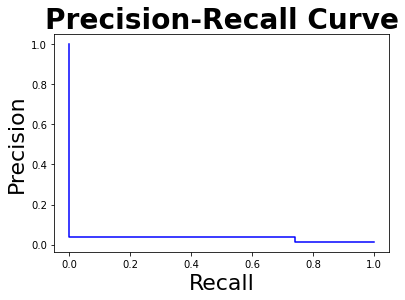

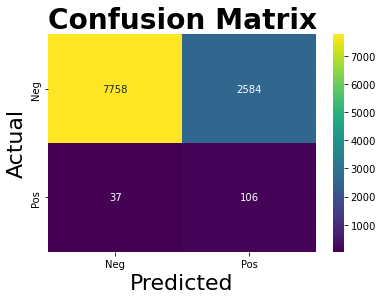

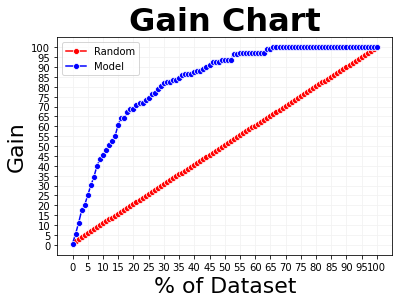

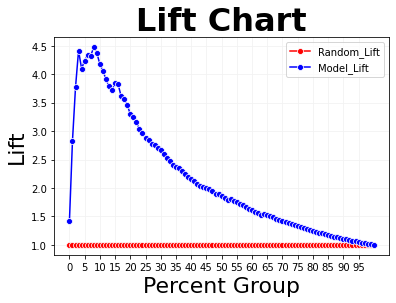

In [35]:
enriched_df = val_viz.complete_evaluation()

In [36]:
enriched_df

,percentile,min_y_proba,max_y_proba,row_count,pos_count,perc_random_events,perc_actual_events,percentile_x_100,Random_Lift,precision,Model_Lift,recall
0,0.00,0.879899,0.922297,53,2,0.990099,1.398601,0.0,1,0.037736,1.412587,1.398601
1,0.01,0.860204,0.879472,158,8,1.980198,5.594406,1.0,1,0.050633,2.825175,5.594406
2,0.02,0.846907,0.860134,263,16,2.970297,11.188811,2.0,1,0.060837,3.766900,11.188811
3,0.03,0.834925,0.846733,367,25,3.960396,17.482517,3.0,1,0.068120,4.414336,17.482517
4,0.04,0.823783,0.834925,472,29,4.950495,20.279720,4.0,1,0.061441,4.096503,20.279720
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.008392,0.008926,10119,143,96.039604,100.000000,96.0,1,0.014132,1.041237,100.000000
97,0.97,0.007517,0.008361,10223,143,97.029703,100.000000,97.0,1,0.013988,1.030612,100.000000
98,0.98,0.006933,0.007517,10328,143,98.019802,100.000000,98.0,1,0.013846,1.020202,100.000000
99,0.99,0.005619,0.006933,10433,143,99.009901,100.000000,99.0,1,0.013707,1.010000,100.000000


***